# DSE 2262 MACHINE LEARNING LABORATORY


## Week 1 - Excercise -2

#### Dataset Meta-Data about boston.csv

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Dataset Naming
The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

Miscellaneous Details
- Origin
The origin of the boston housing data is Natural.
- Usage
This dataset may be used for Assessment.
- Number of Cases
The dataset contains a total of 506 cases.
- Order
The order of the cases is mysterious.
- Variables
There are 14 attributes in each case of the dataset. They are:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

- Note

Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000); Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between $40,000 and $50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.

#### Loading Dataset

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Q1.Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’. 

In [3]:
df = pd.read_csv("Boston.csv")

In [4]:
df.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Plotting correlation plot to find top correlated features for our model

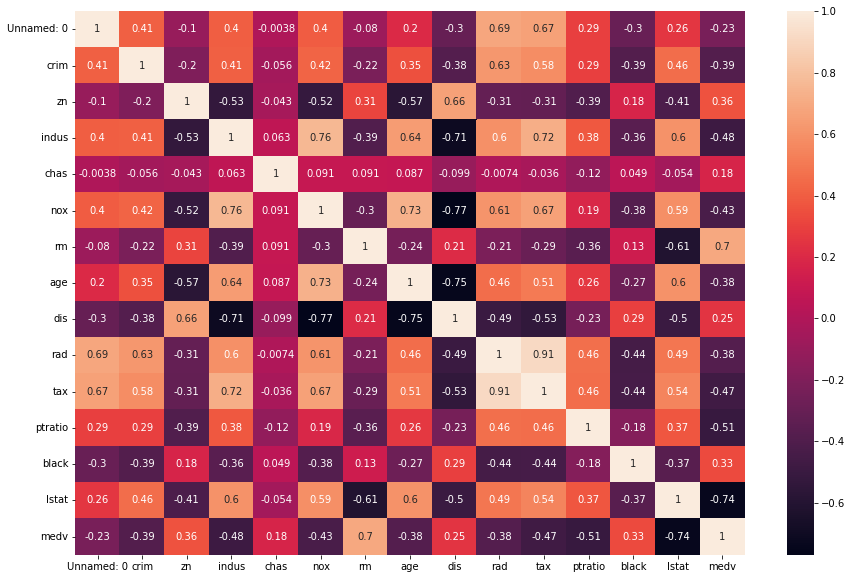

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True)

- **Top 5 Important features are rm,lstat,ptratio,indus,tax respectively.**

- **Top 3 features are 'rm' , 'lstat' , 'ptratio' .**

In [6]:
X = df[['rm','lstat','ptratio']]

In [7]:
X.tail()

,rm,lstat,ptratio
501,6.593,9.67,21.0
502,6.120,9.08,21.0
503,6.976,5.64,21.0
504,6.794,6.48,21.0
505,6.030,7.88,21.0


In [8]:
y = df['medv']

### Q2.Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3features. 

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(X, y)

In [11]:
reg.score(X, y)

0.6786241601613112

In [12]:
reg.coef_

array([ 4.51542094, -0.57180569, -0.93072256])

In [13]:
reg.intercept_

18.567111505395246

### Q3.Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression().fit(X_train, y_train)

In [18]:
reg.score(X_train, y_train)

0.6864566575056517

In [19]:
reg.score(X_test, y_test)

0.6302528487272827

In [20]:
reg.coef_

array([ 4.93311836, -0.56712588, -0.86709475])

In [21]:
reg.intercept_

14.58809926157104

In [22]:
y_pred = reg.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)

In [25]:
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

In [26]:
mse

27.114957415580577

In [27]:
rmse

5.207202455789536

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_true=y_test, y_pred=y_pred)

0.6302528487272827